In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [304]:
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [305]:
# we do not need Unamed column. So, lets remove that column.

In [306]:
df = df.iloc[:,1:]
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [308]:
# Looks like there are no Null values present in the dataset.

In [309]:
df.describe(include='object')

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,...,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,...,271,259,1010,553,689,305,255,360,316,1400


In [310]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [311]:
# There 23 categorical columns and 2 numerical columns in the dataset.

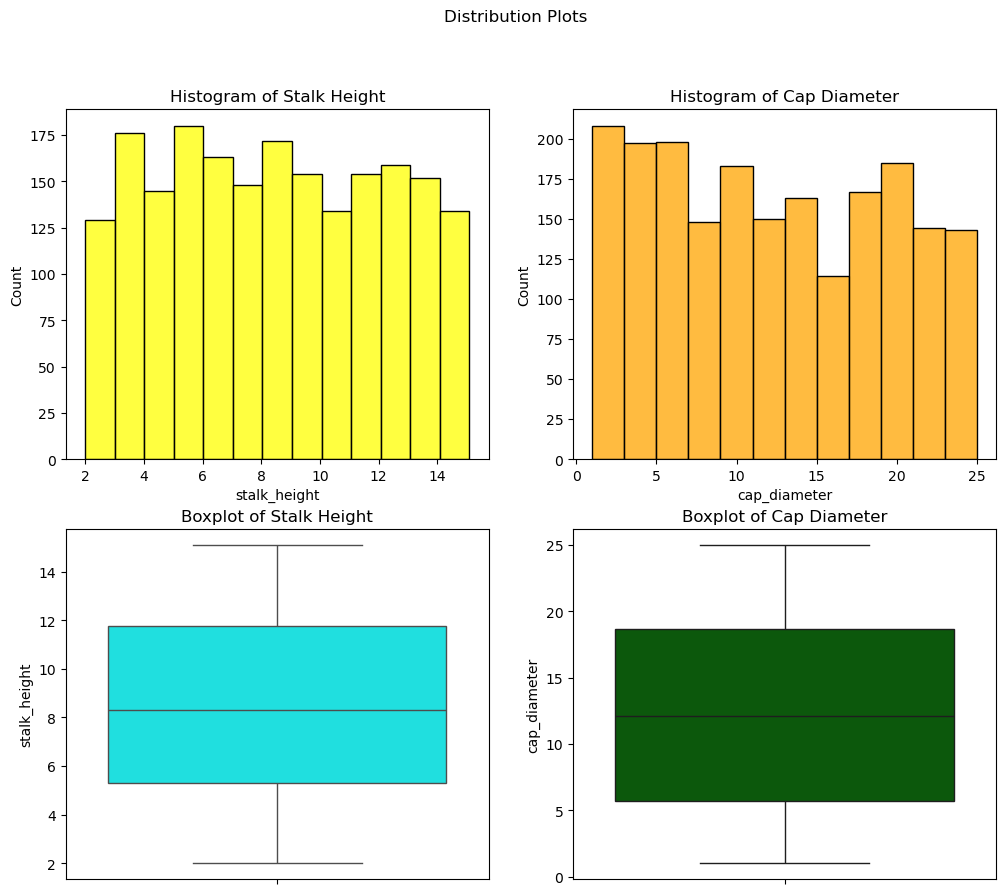

In [312]:
fig,axes = plt.subplots(2,2,figsize=(12,10))
sns.histplot(df['stalk_height'],color='yellow',edgecolor='black',ax=axes[0,0])
axes[0,0].set_title('Histogram of Stalk Height')

sns.histplot(df['cap_diameter'],color='orange',edgecolor='black',ax=axes[0,1])
axes[0,1].set_title('Histogram of Cap Diameter')

sns.boxplot(df['stalk_height'],color='cyan',ax=axes[1,0])
axes[1,0].set_title('Boxplot of Stalk Height')

sns.boxplot(df['cap_diameter'],color='darkgreen',ax=axes[1,1])
axes[1,1].set_title('Boxplot of Cap Diameter')

plt.suptitle('Distribution Plots')
plt.show()

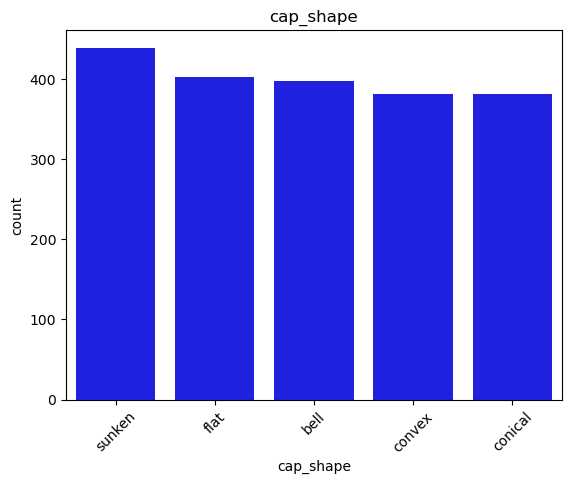

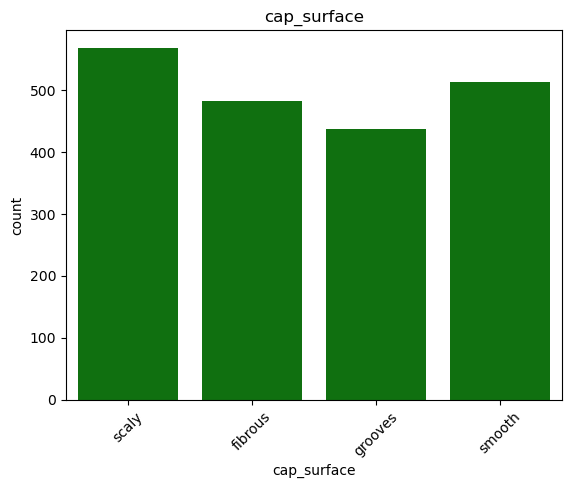

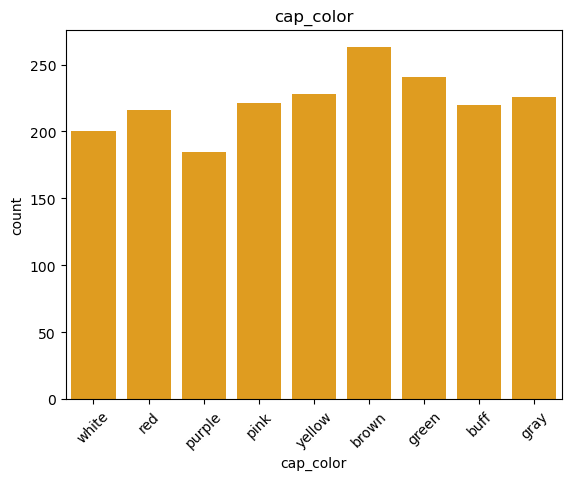

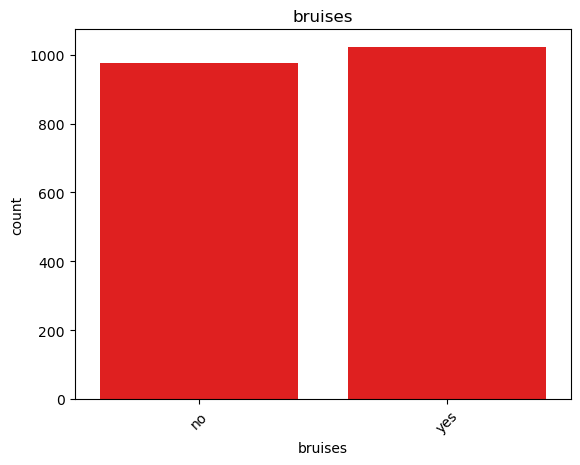

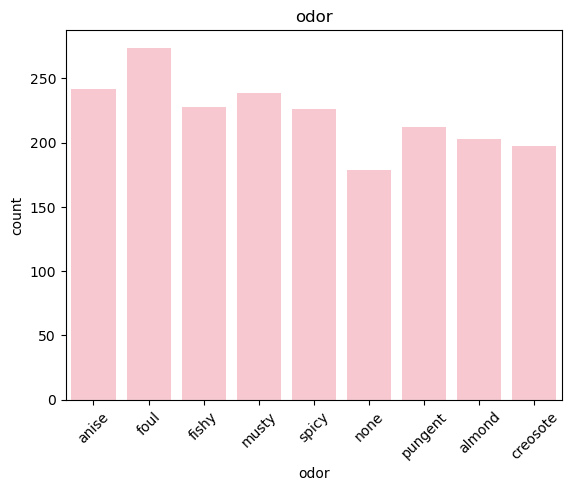

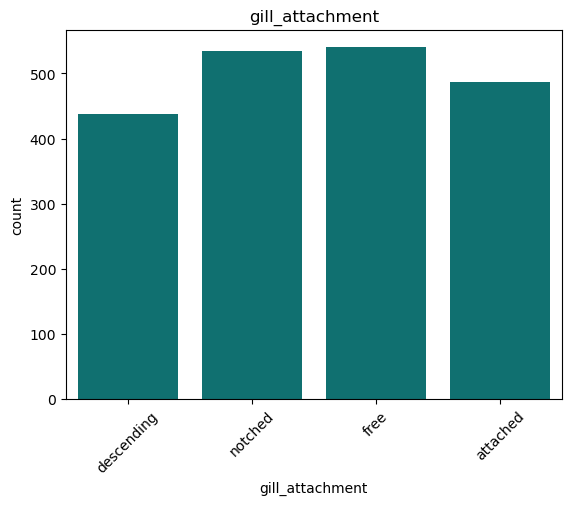

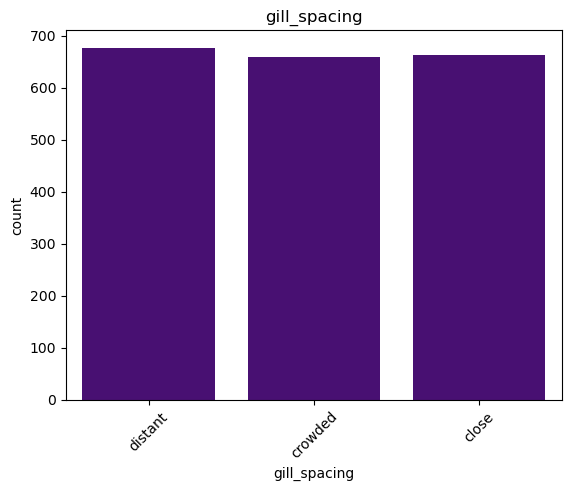

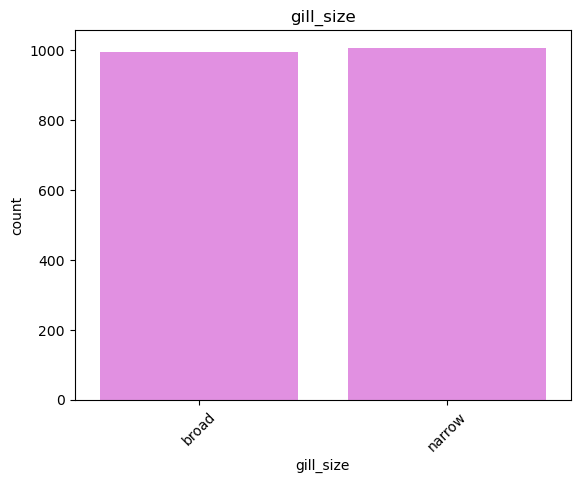

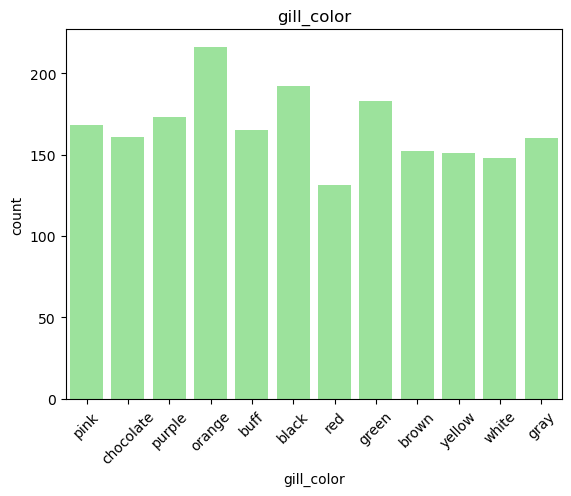

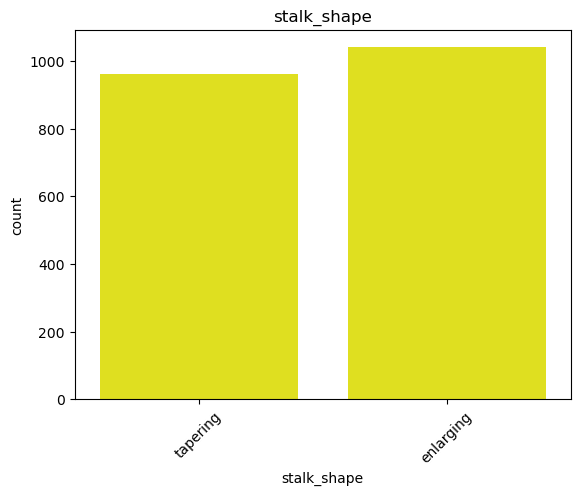

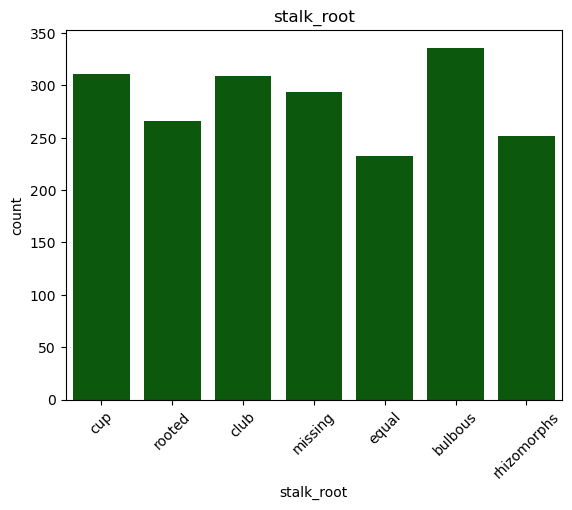

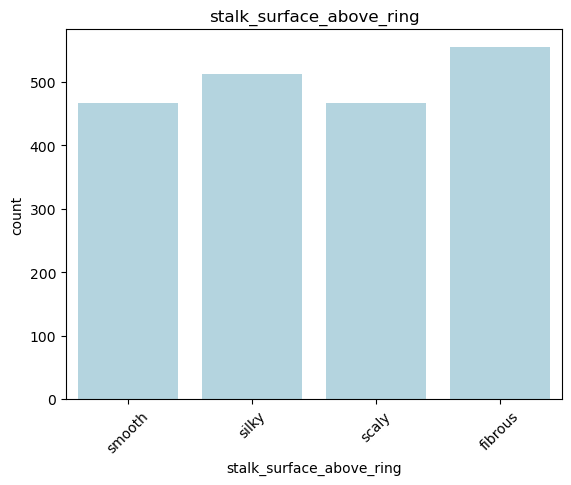

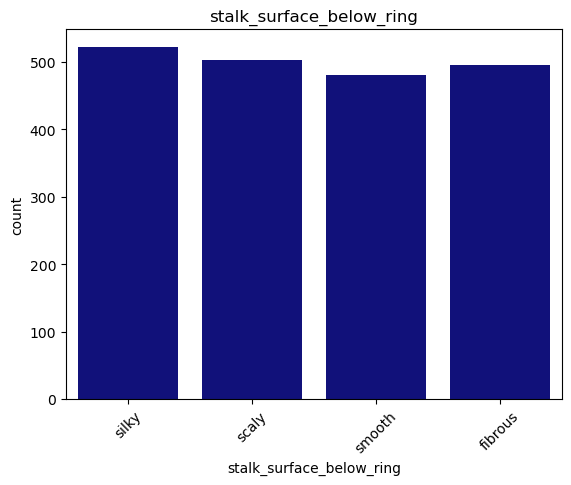

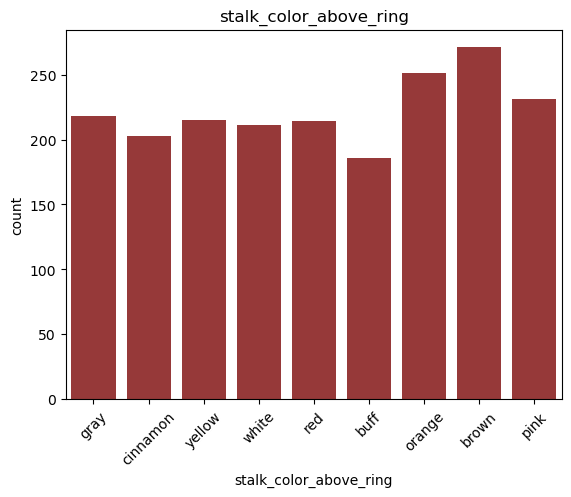

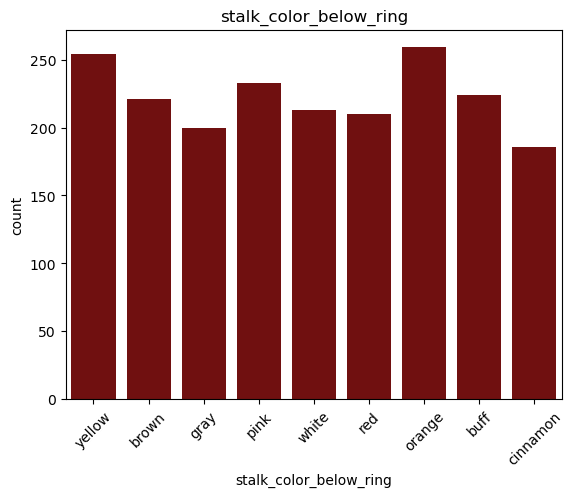

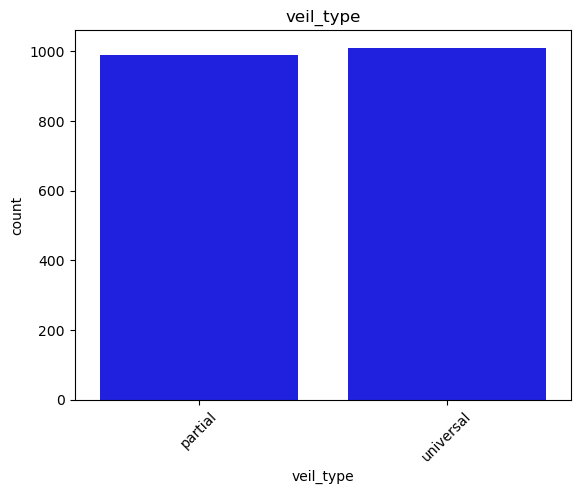

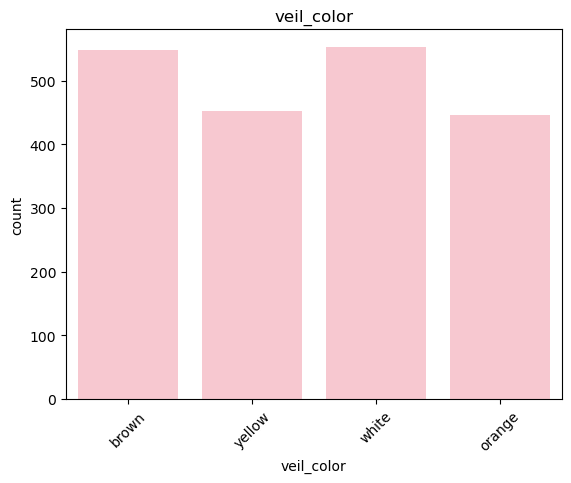

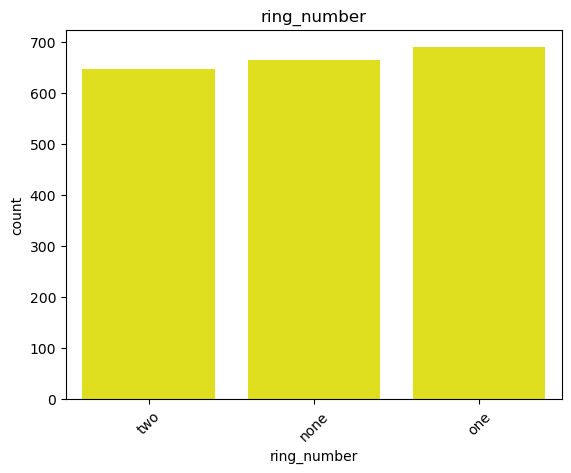

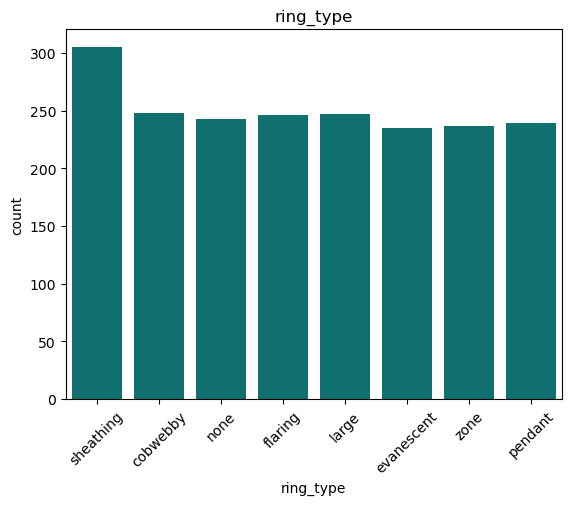

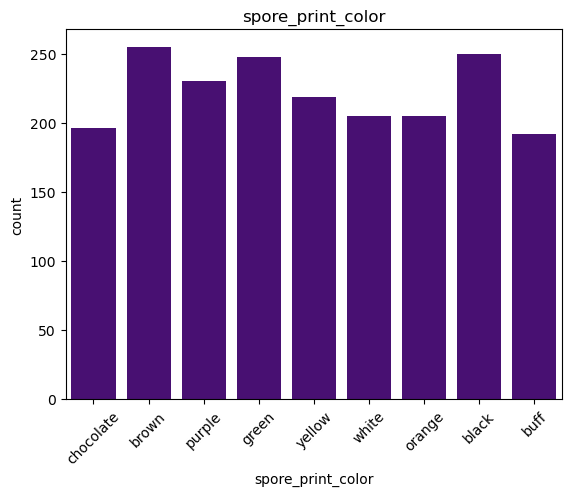

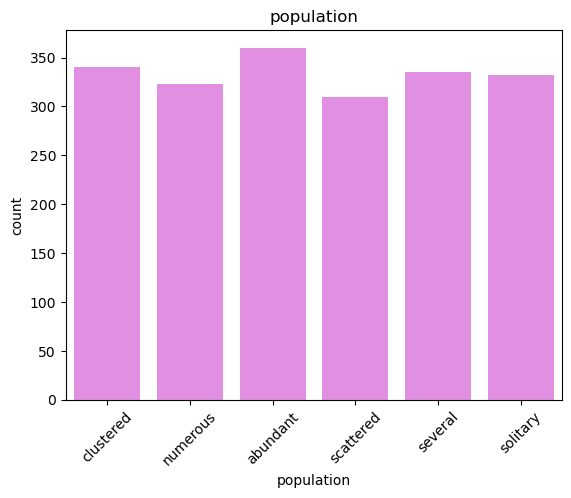

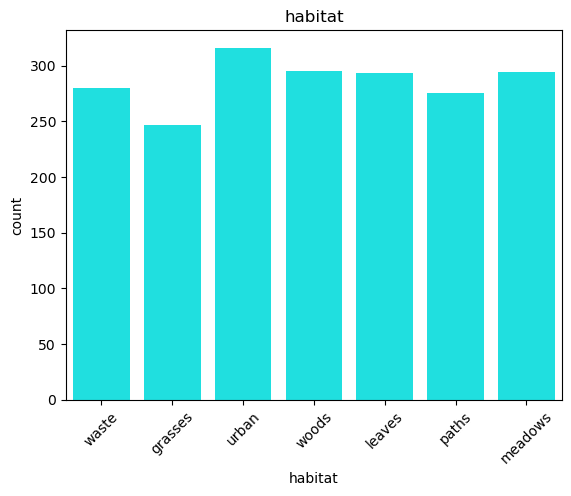

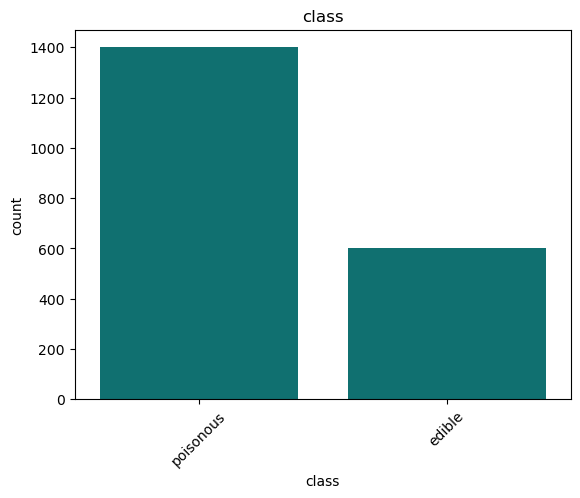

In [313]:
cat_columns = df.columns[0:23]
colors = ['blue','green','orange','red','pink','teal','indigo','violet','lightgreen','yellow','darkgreen','lightblue','darkblue','brown','maroon','blue','pink','yellow','teal','indigo','violet','cyan','teal']
i=0
for col in cat_columns:
    sns.countplot(data=df,x=col,color=colors[i])
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    i+=1
    plt.show()

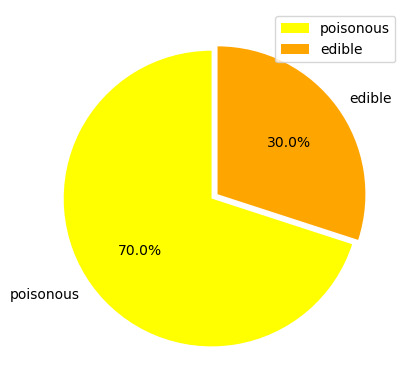

In [314]:
labels = df['class'].value_counts().index
plt.pie(df['class'].value_counts(),labels=labels,autopct='%1.1f%%',startangle=90,explode=[0.05,0],colors=['yellow','orange'])
plt.legend()
plt.show()

<Axes: >

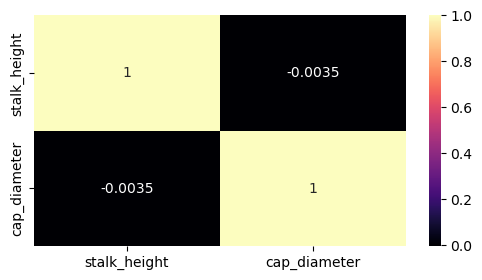

In [315]:
df_num = df[['stalk_height','cap_diameter']]
plt.figure(figsize=(6,3))
sns.heatmap(df_num.corr(),annot=True,cmap='magma')


In [316]:
# We need to encode these categorical columns using Label encoder.

In [317]:
df_encoded = df.copy()
le = LabelEncoder()
for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])
df_encoded

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


<Axes: >

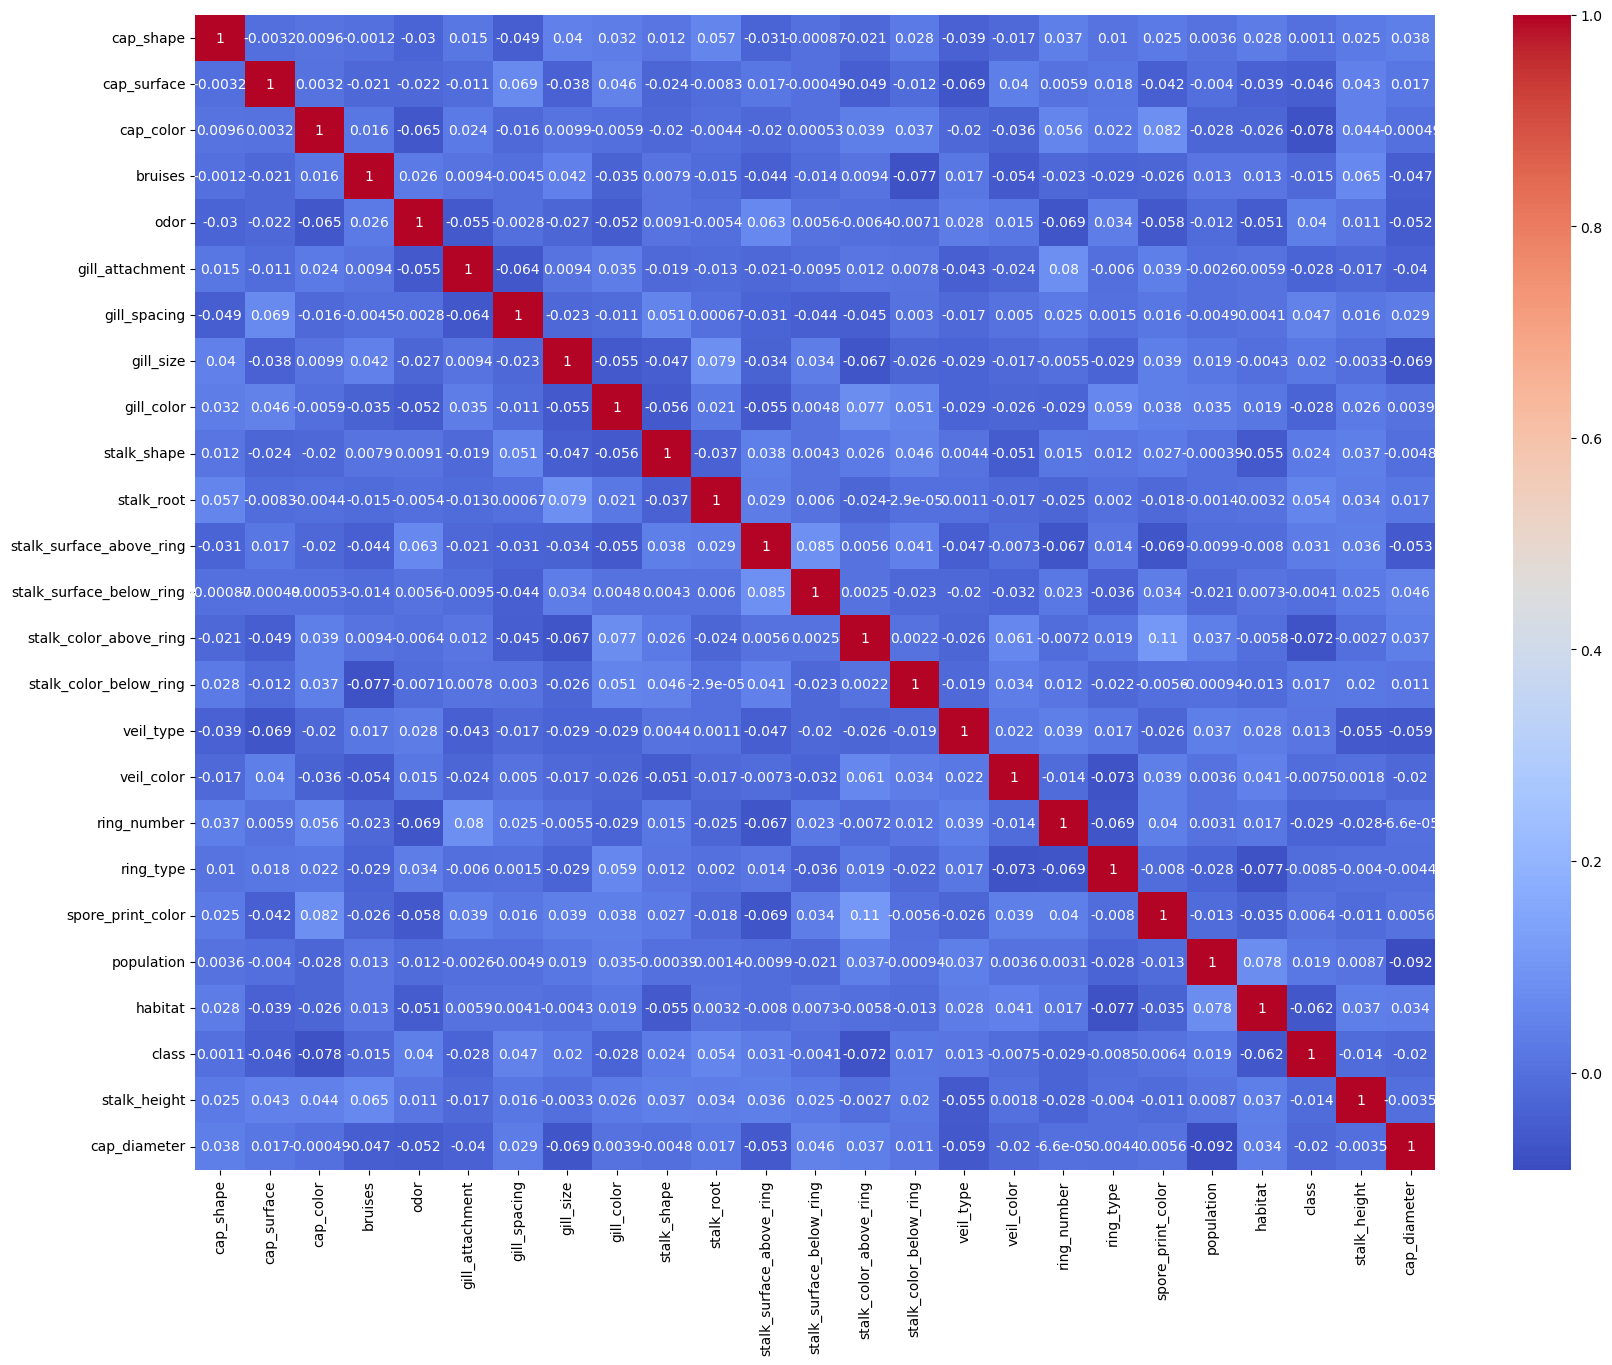

In [318]:
plt.figure(figsize=(20,15))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')

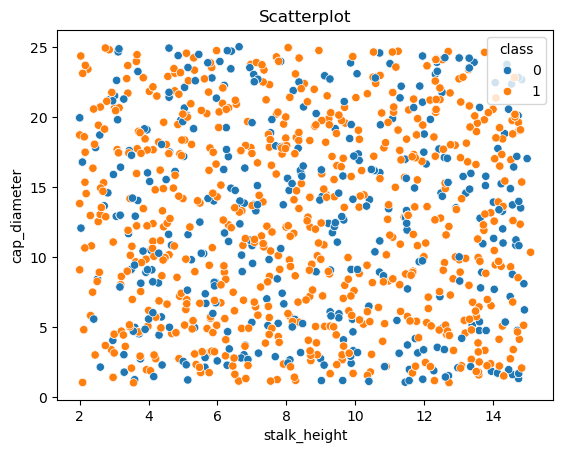

In [319]:
sns.scatterplot(x='stalk_height',y='cap_diameter',data=df_encoded,hue='class')
plt.title('Scatterplot')
plt.show()

Text(0.5, 1.0, 'Kdeplot')

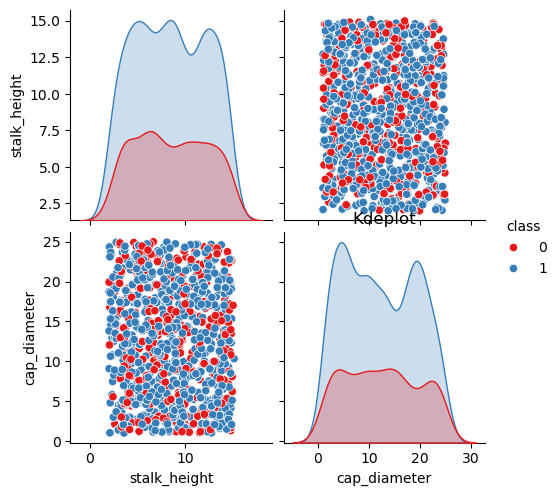

In [320]:
sns.pairplot(df_encoded,hue='class',vars=['stalk_height','cap_diameter'],palette='Set1')
plt.title('Kdeplot')

In [321]:
# Lets divide the dataset into X and y as independent and dependent variables respectively.

In [322]:
X = df_encoded.drop(columns = 'class')
y = df_encoded['class']

In [323]:
print(X.shape)
print(y.shape)

(2000, 24)
(2000,)


In [324]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=897)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 24)
(400, 24)
(1600,)
(400,)


In [325]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.73

In [326]:
print(classification_report(y_pred,y_test)) # Linear Kernel

              precision    recall  f1-score   support

           0       0.01      1.00      0.02         1
           1       1.00      0.73      0.84       399

    accuracy                           0.73       400
   macro avg       0.50      0.86      0.43       400
weighted avg       1.00      0.73      0.84       400



In [408]:
# This is a basic SVM model

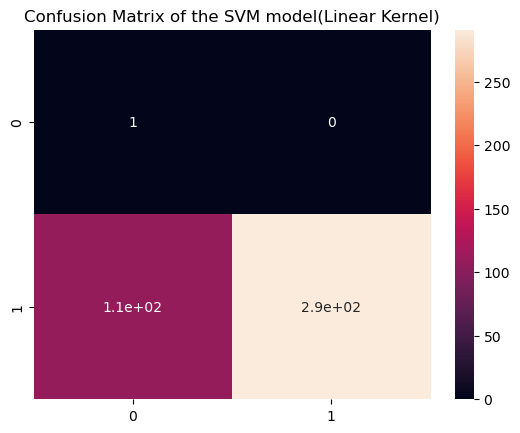

In [416]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.title('Confusion Matrix of the SVM model(Linear Kernel)')
plt.show()

In [329]:
# Now lets use some parameters to improve the model's performance.

In [374]:
model2 = SVC(kernel='poly',C=0.5)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7375

In [376]:
print(classification_report(y_test,y_pred2)) # Polynomial Kernel

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       109
           1       0.73      1.00      0.85       291

    accuracy                           0.74       400
   macro avg       0.87      0.52      0.46       400
weighted avg       0.81      0.74      0.64       400



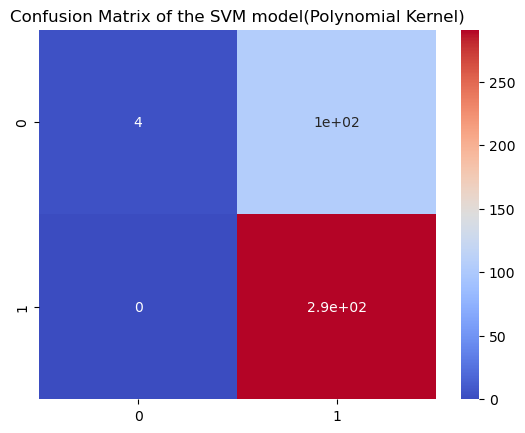

In [430]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,cmap='coolwarm')
plt.title('Confusion Matrix of the SVM model(Polynomial Kernel)')
plt.show()

In [378]:
# We can see that our model performance has improved slightly. lets use Grid serach CV to tune hyperparameters and find best parameters for the model.

In [402]:
params = {
    'kernel': ['linear','poly','rbf'],
    'C': [1,2,3],
}
grid = GridSearchCV(SVC(),params,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Model Report:\n", classification_report(y_test, y_pred_best)) # RBF Kernel

Best Parameters: {'C': 3, 'kernel': 'rbf'}
Tuned Model Accuracy: 0.7625

Tuned Model Report:
               precision    recall  f1-score   support

           0       0.72      0.21      0.33       109
           1       0.77      0.97      0.86       291

    accuracy                           0.76       400
   macro avg       0.74      0.59      0.59       400
weighted avg       0.75      0.76      0.71       400



In [406]:
# We can see that the best parameters for the SVM model is radial basis function kernel and regularisation = 3 which gives 76% accuracy

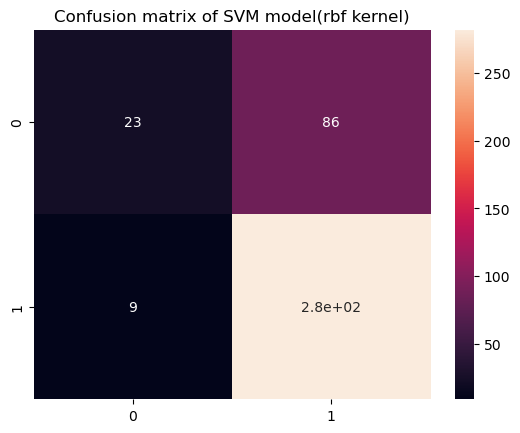

In [426]:
sns.heatmap(confusion_matrix(y_test, y_pred_best),annot=True)
plt.title('Confusion matrix of SVM model(rbf kernel)')
plt.show()

# Task 7: Comparison and Analysis

# 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

# 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

# 3.	Discuss practical implications of SVM in real-world classification tasks.